<table style="text-align: left">
    <tr>
        <td>
            <label style="text-align: center;font-size:20px;font-weight: bold;color:#082BAF">Seattle Car Accident Severity — IBM Applied Data Science Capstone</label>
        </td>
    </tr>
    <tr>
        <td><label style="text-align: left">This is the applied data science capstone project, which is the last step towards obtaining the IBM Data Science Professional Certificate.</label>
        </td>
    </tr>
</table>
<hr>

<h5> Dowload the dataset from the source</h5>

In [1]:
!wget -O Collisions.csv https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv?outSR=%7B%22latestWkid%22%3A2926%2C%22wkid%22%3A2926%7D

--2020-10-27 16:40:37--  https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv?outSR=%7B%22latestWkid%22%3A2926%2C%22wkid%22%3A2926%7D
Resolving data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)... 3.219.100.202, 52.2.161.122, 35.169.194.0, ...
Connecting to data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)|3.219.100.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘Collisions.csv’

Collisions.csv          [     <=>            ]  81.00M  90.6MB/s    in 0.9s    

2020-10-27 16:40:52 (90.6 MB/s) - ‘Collisions.csv’ saved [84940291]



#### Load the dataset on dataframe

In [2]:
import pandas as pd
data=pd.read_csv("Collisions.csv", delimiter=",")
data.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1.279919e+06,227011.304221,1,1301,1301,3645759,Matched,Block,NaN,E UNION ST BETWEEN M L KING JR WAY AND 30TH AVE,...,Dry,Unknown,NaN,NaN,NaN,32,One parked--one moving,0,0,N
1,1.283898e+06,203722.009477,2,68400,68400,2806976,Matched,Block,NaN,RAINIER AVE S BETWEEN S JUNEAU ST AND S KENNY ST,...,Dry,Daylight,NaN,7119006.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1.278900e+06,246480.058544,3,39000,39000,2023608,Matched,Intersection,25949.0,25TH AVE NE AND NE BLAKELEY ST,...,Dry,Daylight,NaN,5166021.0,NaN,45,Vehicle - Pedalcyclist,0,0,N
3,1.272081e+06,222140.453528,4,48100,48100,1316838,Matched,Intersection,30511.0,6TH AVE S AND S JACKSON ST,...,Dry,Daylight,NaN,5159022.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,1.260306e+06,255724.809914,5,1001,1001,3501405,Matched,Intersection,37265.0,15TH AVE NW AND NW 85TH ST,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N


In [3]:
data.shape

(222023, 40)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222023 entries, 0 to 222022
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214544 non-null  float64
 1   Y                214544 non-null  float64
 2   OBJECTID         222023 non-null  int64  
 3   INCKEY           222023 non-null  int64  
 4   COLDETKEY        222023 non-null  int64  
 5   REPORTNO         222023 non-null  object 
 6   STATUS           222023 non-null  object 
 7   ADDRTYPE         218308 non-null  object 
 8   INTKEY           72114 non-null   float64
 9   LOCATION         217429 non-null  object 
 10  EXCEPTRSNCODE    101620 non-null  object 
 11  EXCEPTRSNDESC    11792 non-null   object 
 12  SEVERITYCODE     222022 non-null  object 
 13  SEVERITYDESC     222023 non-null  object 
 14  COLLISIONTYPE    195563 non-null  object 
 15  PERSONCOUNT      222023 non-null  int64  
 16  PEDCOUNT         222023 non-null  int6

In [5]:
data.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,2.145440e+05,214544.000000,222023.000000,222023.000000,222023.000000,72114.000000,222023.000000,222023.000000,222023.000000,222023.000000,222023.000000,222023.000000,222023.000000,222022.000000,1.272050e+05,222023.000000,2.220230e+05
mean,1.271148e+06,229817.402670,111012.000000,145249.929188,145481.793418,37641.554289,2.226832,0.038091,0.027358,1.729713,0.373948,0.015233,0.001703,13.385637,7.971063e+06,262.936691,9.560473e+03
std,7.362371e+03,20469.000824,64092.663746,89572.202293,89951.524447,51995.781698,1.469551,0.201682,0.164525,0.830448,0.731979,0.158084,0.044888,7.299483,2.611523e+06,3254.128113,7.139943e+04
min,1.248139e+06,184059.089009,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.266679e+06,214123.651599,55506.500000,71792.500000,71792.500000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,1.271142e+06,228331.418142,111012.000000,127502.000000,127502.000000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,1.276030e+06,245908.853680,166517.500000,210425.500000,210665.500000,33985.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,1.293052e+06,271525.414794,222023.000000,334641.000000,336141.000000,764413.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


<h1>Identifying missing data </h1>

<h5>Once the data set was downloaded, the analysis of the attribute information of the dataset was performed and the 16 most relevant features were selected. </h5>

In [6]:
data=data[['SEVERITYCODE','SEVERITYDESC','COLLISIONTYPE','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND',
'SPEEDING','ADDRTYPE','INCDATE','INCDTTM']]
data.head()

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ADDRTYPE,INCDATE,INCDTTM
0,1,Property Damage Only Collision,Parked Car,NaN,NaN,N,Unknown,Dry,Unknown,NaN,Block,2013/03/31 00:00:00+00,3/31/2013 11:00:00 PM
1,1,Property Damage Only Collision,Sideswipe,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,Block,2007/04/29 00:00:00+00,4/29/2007 6:41:00 AM
2,2,Injury Collision,Cycles,At Intersection (intersection related),NaN,0,Clear,Dry,Daylight,NaN,Intersection,2005/06/15 00:00:00+00,6/15/2005 7:12:00 PM
3,1,Property Damage Only Collision,Left Turn,At Intersection (intersection related),NaN,0,Overcast,Dry,Daylight,NaN,Intersection,2005/06/08 00:00:00+00,6/8/2005
4,1,Property Damage Only Collision,Sideswipe,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,Intersection,2013/03/20 00:00:00+00,3/20/2013 4:08:00 PM


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222023 entries, 0 to 222022
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    222022 non-null  object
 1   SEVERITYDESC    222023 non-null  object
 2   COLLISIONTYPE   195563 non-null  object
 3   JUNCTIONTYPE    210044 non-null  object
 4   INATTENTIONIND  30190 non-null   object
 5   UNDERINFL       195583 non-null  object
 6   WEATHER         195373 non-null  object
 7   ROADCOND        195454 non-null  object
 8   LIGHTCOND       195284 non-null  object
 9   SPEEDING        9951 non-null    object
 10  ADDRTYPE        218308 non-null  object
 11  INCDATE         222023 non-null  object
 12  INCDTTM         222023 non-null  object
dtypes: object(13)
memory usage: 22.0+ MB


In [8]:
data.shape

(222023, 13)

#### Replace empty(?) values by null

In [9]:
import numpy as np
data.replace("?", np.nan, inplace = True)
data.head()

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ADDRTYPE,INCDATE,INCDTTM
0,1,Property Damage Only Collision,Parked Car,NaN,NaN,N,Unknown,Dry,Unknown,NaN,Block,2013/03/31 00:00:00+00,3/31/2013 11:00:00 PM
1,1,Property Damage Only Collision,Sideswipe,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,Block,2007/04/29 00:00:00+00,4/29/2007 6:41:00 AM
2,2,Injury Collision,Cycles,At Intersection (intersection related),NaN,0,Clear,Dry,Daylight,NaN,Intersection,2005/06/15 00:00:00+00,6/15/2005 7:12:00 PM
3,1,Property Damage Only Collision,Left Turn,At Intersection (intersection related),NaN,0,Overcast,Dry,Daylight,NaN,Intersection,2005/06/08 00:00:00+00,6/8/2005
4,1,Property Damage Only Collision,Sideswipe,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,Intersection,2013/03/20 00:00:00+00,3/20/2013 4:08:00 PM


Check if there is null values through the features

In [10]:
missing_data=data.isnull()
for column in missing_data.columns.values.tolist():
    print ('Column:',column)
    print(missing_data[column].value_counts())
    print('===================================')

Column: SEVERITYCODE
False    222022
True          1
Name: SEVERITYCODE, dtype: int64
Column: SEVERITYDESC
False    222023
Name: SEVERITYDESC, dtype: int64
Column: COLLISIONTYPE
False    195563
True      26460
Name: COLLISIONTYPE, dtype: int64
Column: JUNCTIONTYPE
False    210044
True      11979
Name: JUNCTIONTYPE, dtype: int64
Column: INATTENTIONIND
True     191833
False     30190
Name: INATTENTIONIND, dtype: int64
Column: UNDERINFL
False    195583
True      26440
Name: UNDERINFL, dtype: int64
Column: WEATHER
False    195373
True      26650
Name: WEATHER, dtype: int64
Column: ROADCOND
False    195454
True      26569
Name: ROADCOND, dtype: int64
Column: LIGHTCOND
False    195284
True      26739
Name: LIGHTCOND, dtype: int64
Column: SPEEDING
True     212072
False      9951
Name: SPEEDING, dtype: int64
Column: ADDRTYPE
False    218308
True       3715
Name: ADDRTYPE, dtype: int64
Column: INCDATE
False    222023
Name: INCDATE, dtype: int64
Column: INCDTTM
False    222023
Name: INCDTTM, dty

In [11]:
data['SEVERITYCODE'].value_counts()

1     137941
2      58915
0      21693
2b      3119
3        354
Name: SEVERITYCODE, dtype: int64

In [12]:
data['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137941
Injury Collision                   58915
Unknown                            21694
Serious Injury Collision            3119
Fatality Collision                   354
Name: SEVERITYDESC, dtype: int64

In [13]:
data['COLLISIONTYPE'].value_counts()

Parked Car    48602
Angles        35654
Rear Ended    34756
Other         24636
Sideswipe     18929
Left Turn     14149
Pedestrian     7677
Cycles         5944
Right Turn     3022
Head On        2194
Name: COLLISIONTYPE, dtype: int64

In [14]:
data['COLLISIONTYPE'].isnull().value_counts()

False    195563
True      26460
Name: COLLISIONTYPE, dtype: int64

In [15]:
missing_data

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ADDRTYPE,INCDATE,INCDTTM
0,False,False,False,True,True,False,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,False,False,True,False,False,False
4,False,False,False,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222018,False,False,False,False,True,False,False,False,False,True,False,False,False
222019,False,False,False,False,True,False,False,False,False,True,False,False,False
222020,False,False,False,False,True,False,False,False,False,True,False,False,False
222021,False,False,False,False,True,False,False,False,False,True,False,False,False


In [16]:
missing_data.sum(axis=1)

0         3
1         2
2         2
3         2
4         2
         ..
222018    2
222019    2
222020    2
222021    2
222022    2
Length: 222023, dtype: int64

In [17]:
missing_data.iloc[3]

SEVERITYCODE      False
SEVERITYDESC      False
COLLISIONTYPE     False
JUNCTIONTYPE      False
INATTENTIONIND     True
UNDERINFL         False
WEATHER           False
ROADCOND          False
LIGHTCOND         False
SPEEDING           True
ADDRTYPE          False
INCDATE           False
INCDTTM           False
Name: 3, dtype: bool

In [18]:
missing_data['total']=missing_data.sum(axis=1)
missing_data.head()

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ADDRTYPE,INCDATE,INCDTTM,total
0,False,False,False,True,True,False,False,False,False,True,False,False,False,3
1,False,False,False,False,True,False,False,False,False,True,False,False,False,2
2,False,False,False,False,True,False,False,False,False,True,False,False,False,2
3,False,False,False,False,True,False,False,False,False,True,False,False,False,2
4,False,False,False,False,True,False,False,False,False,True,False,False,False,2


In [19]:
missing_data.sort_values(by=['total'], ascending=False)

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ADDRTYPE,INCDATE,INCDTTM,total
87391,False,False,True,True,True,True,True,True,True,True,True,False,False,9
79982,False,False,True,True,True,True,True,True,True,True,True,False,False,9
157862,False,False,True,True,True,True,True,True,True,True,True,False,False,9
110420,False,False,True,True,True,True,True,True,True,True,True,False,False,9
196132,False,False,True,True,True,True,True,True,True,True,True,False,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165676,False,False,False,False,False,False,False,False,False,False,False,False,False,0
171470,False,False,False,False,False,False,False,False,False,False,False,False,False,0
215214,False,False,False,False,False,False,False,False,False,False,False,False,False,0
107524,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [20]:
(missing_data['total']>2).sum()

32843

In [21]:
keys_missing=(missing_data['total']>2)
keys_missing

0          True
1         False
2         False
3         False
4         False
          ...  
222018    False
222019    False
222020    False
222021    False
222022    False
Name: total, Length: 222023, dtype: bool

In [22]:
data.head()

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ADDRTYPE,INCDATE,INCDTTM
0,1,Property Damage Only Collision,Parked Car,NaN,NaN,N,Unknown,Dry,Unknown,NaN,Block,2013/03/31 00:00:00+00,3/31/2013 11:00:00 PM
1,1,Property Damage Only Collision,Sideswipe,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,Block,2007/04/29 00:00:00+00,4/29/2007 6:41:00 AM
2,2,Injury Collision,Cycles,At Intersection (intersection related),NaN,0,Clear,Dry,Daylight,NaN,Intersection,2005/06/15 00:00:00+00,6/15/2005 7:12:00 PM
3,1,Property Damage Only Collision,Left Turn,At Intersection (intersection related),NaN,0,Overcast,Dry,Daylight,NaN,Intersection,2005/06/08 00:00:00+00,6/8/2005
4,1,Property Damage Only Collision,Sideswipe,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,Intersection,2013/03/20 00:00:00+00,3/20/2013 4:08:00 PM


In [23]:
data[keys_missing]

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ADDRTYPE,INCDATE,INCDTTM
0,1,Property Damage Only Collision,Parked Car,NaN,NaN,N,Unknown,Dry,Unknown,NaN,Block,2013/03/31 00:00:00+00,3/31/2013 11:00:00 PM
22,0,Unknown,NaN,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,NaN,NaN,Block,2005/09/19 00:00:00+00,9/19/2005
24,1,Property Damage Only Collision,Other,NaN,NaN,0,Clear,Ice,Dark - Street Lights Off,NaN,Alley,2008/01/22 00:00:00+00,1/22/2008 8:00:00 PM
33,0,Unknown,NaN,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,NaN,NaN,Block,2013/03/22 00:00:00+00,3/22/2013
36,0,Unknown,NaN,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,NaN,NaN,Block,2013/03/31 00:00:00+00,3/31/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222001,0,Unknown,NaN,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,NaN,NaN,Block,2020/09/19 00:00:00+00,9/19/2020
222006,0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alley,2020/08/30 00:00:00+00,8/30/2020
222007,1,Property Damage Only Collision,NaN,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,NaN,NaN,Block,2020/08/03 00:00:00+00,8/3/2020
222012,1,Property Damage Only Collision,NaN,Mid-Block (not related to intersection),NaN,NaN,NaN,NaN,NaN,NaN,Block,2020/08/12 00:00:00+00,8/12/2020


Let's drop the missing values

In [24]:
data.drop(data[keys_missing].index.values, inplace=True)
data.head()

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ADDRTYPE,INCDATE,INCDTTM
1,1,Property Damage Only Collision,Sideswipe,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,Block,2007/04/29 00:00:00+00,4/29/2007 6:41:00 AM
2,2,Injury Collision,Cycles,At Intersection (intersection related),NaN,0,Clear,Dry,Daylight,NaN,Intersection,2005/06/15 00:00:00+00,6/15/2005 7:12:00 PM
3,1,Property Damage Only Collision,Left Turn,At Intersection (intersection related),NaN,0,Overcast,Dry,Daylight,NaN,Intersection,2005/06/08 00:00:00+00,6/8/2005
4,1,Property Damage Only Collision,Sideswipe,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,Intersection,2013/03/20 00:00:00+00,3/20/2013 4:08:00 PM
5,1,Property Damage Only Collision,Right Turn,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,Block,2013/04/02 00:00:00+00,4/2/2013 9:37:00 AM


In [25]:
missing_data=data.isnull()
for column in missing_data.columns.values.tolist():
    print ('Column:',column)
    print(missing_data[column].value_counts())
    print('===================================')

Column: SEVERITYCODE
False    189180
Name: SEVERITYCODE, dtype: int64
Column: SEVERITYDESC
False    189180
Name: SEVERITYDESC, dtype: int64
Column: COLLISIONTYPE
False    189178
True          2
Name: COLLISIONTYPE, dtype: int64
Column: JUNCTIONTYPE
False    188727
True        453
Name: JUNCTIONTYPE, dtype: int64
Column: INATTENTIONIND
True     159106
False     30074
Name: INATTENTIONIND, dtype: int64
Column: UNDERINFL
False    189180
Name: UNDERINFL, dtype: int64
Column: WEATHER
False    189154
True         26
Name: WEATHER, dtype: int64
Column: ROADCOND
False    189174
True          6
Name: ROADCOND, dtype: int64
Column: LIGHTCOND
False    189132
True         48
Name: LIGHTCOND, dtype: int64
Column: SPEEDING
True     179266
False      9914
Name: SPEEDING, dtype: int64
Column: ADDRTYPE
False    189134
True         46
Name: ADDRTYPE, dtype: int64
Column: INCDATE
False    189180
Name: INCDATE, dtype: int64
Column: INCDTTM
False    189180
Name: INCDTTM, dtype: int64


In [26]:
data[data['COLLISIONTYPE'].isnull()].head()

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ADDRTYPE,INCDATE,INCDTTM
193554,2,Injury Collision,NaN,Mid-Block (not related to intersection),Y,N,Clear,Dry,Dark - Street Lights On,NaN,Block,2018/01/14 00:00:00+00,1/14/2018 11:28:00 PM
193827,2,Injury Collision,NaN,At Intersection (intersection related),NaN,N,Raining,Wet,Daylight,Y,Intersection,2018/01/05 00:00:00+00,1/5/2018 2:50:00 PM


In [27]:
data['COLLISIONTYPE'].value_counts().idxmax()

'Parked Car'

In [28]:
data['COLLISIONTYPE'].replace(np.nan, data['COLLISIONTYPE'].value_counts().idxmax(), inplace=True)

In [29]:
data[data['COLLISIONTYPE'].isnull()].head()

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ADDRTYPE,INCDATE,INCDTTM


In [30]:
data['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89283
At Intersection (intersection related)               63781
Mid-Block (but intersection related)                 22680
Driveway Junction                                    10725
At Intersection (but not related to intersection)     2087
Ramp Junction                                          166
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

#### Let's normalize the data
There are several values in each features,then we unify some of them based on similarities.

In [31]:
data['JUNCTIONTYPE'].replace(np.nan, data['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)

In [32]:
data['JUNCTIONTYPE'].replace('Mid-Block (not related to intersection)', 'Not related to intersection', inplace=True)
data['JUNCTIONTYPE'].replace('At Intersection (intersection related)', 'Intersection related', inplace=True)
data['JUNCTIONTYPE'].replace('Mid-Block (but intersection related)', 'Intersection related', inplace=True)
data['JUNCTIONTYPE'].replace('Driveway Junction', 'Driveway/Ramp Junction', inplace=True)
data['JUNCTIONTYPE'].replace('At Intersection (but not related to intersection)', 'Not related to intersection', inplace=True)
data['JUNCTIONTYPE'].replace('Ramp Junction', 'Driveway/Ramp Junction', inplace=True)
data['JUNCTIONTYPE'].replace('Unknown', data['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
data['JUNCTIONTYPE'].value_counts()

Not related to intersection    91828
Intersection related           86461
Driveway/Ramp Junction         10891
Name: JUNCTIONTYPE, dtype: int64

In [33]:
data['INATTENTIONIND'].value_counts()

Y    30074
Name: INATTENTIONIND, dtype: int64

In the case of the feature 'INATTENTIONIND' we can see there are only 'Y' (yes) value, so the rest of the values we replace by 'N' (No) value.

In [34]:
data['INATTENTIONIND'].replace(np.nan, 'N', inplace=True)
data['INATTENTIONIND'].value_counts()

N    159106
Y     30074
Name: INATTENTIONIND, dtype: int64

In [35]:
data['UNDERINFL'].value_counts()

N    99420
0    80247
Y     5302
1     4211
Name: UNDERINFL, dtype: int64

In [36]:
data['UNDERINFL'].replace(np.nan, data['UNDERINFL'].value_counts().idxmax(), inplace=True)

In [37]:
data['UNDERINFL'].value_counts()

N    99420
0    80247
Y     5302
1     4211
Name: UNDERINFL, dtype: int64

Unify 0 with 'N' values, and 1 with 'Y' values

In [38]:
data['UNDERINFL']=data['UNDERINFL'].map({'N':0,'0':0, 'Y':1, '1': 1})

In [39]:
data['UNDERINFL'].value_counts()

0    179667
1      9513
Name: UNDERINFL, dtype: int64

In [40]:
data['WEATHER'].value_counts()

Clear                       113173
Raining                      33611
Overcast                     28094
Unknown                      11826
Snowing                        896
Other                          779
Fog/Smog/Smoke                 575
Sleet/Hail/Freezing Rain       115
Blowing Sand/Dirt               49
Severe Crosswind                26
Partly Cloudy                   10
Name: WEATHER, dtype: int64

In [41]:
data['WEATHER'].replace('Raining', 'FogRainSnow', inplace=True)
data['WEATHER'].replace('Overcast', 'WindSandOvercast', inplace=True)
data['WEATHER'].replace('Snowing', 'FogRainSnow', inplace=True)
data['WEATHER'].replace('Fog/Smog/Smoke', 'FogRainSnow', inplace=True)
data['WEATHER'].replace('Raining', 'FogRainSnow', inplace=True)
data['WEATHER'].replace('Sleet/Hail/Freezing Rain', 'FogRainSnow', inplace=True)
data['WEATHER'].replace('Blowing Sand/Dirt', 'WindSandOvercast', inplace=True)
data['WEATHER'].replace('Severe Crosswind', 'WindSandOvercast', inplace=True)
data['WEATHER'].replace('Partly Cloudy', 'WindSandOvercast', inplace=True)
data['WEATHER'].replace(np.nan, data['WEATHER'].value_counts().idxmax(), inplace=True)
data['WEATHER'].replace('Other', 'Unknown', inplace=True)
data['WEATHER'].value_counts()

Clear               113199
FogRainSnow          35197
WindSandOvercast     28179
Unknown              12605
Name: WEATHER, dtype: int64

In [42]:
data['ROADCOND'].value_counts()

Dry               126788
Wet                48080
Unknown            11743
Ice                 1204
Snow/Slush           989
Other                127
Standing Water       112
Sand/Mud/Dirt         70
Oil                   61
Name: ROADCOND, dtype: int64

In [43]:
data['ROADCOND'].replace('Wet', 'IceWetOil', inplace=True)
data['ROADCOND'].replace('Ice', 'IceWetOil', inplace=True)
data['ROADCOND'].replace('Snow/Slush', 'IceWetOil', inplace=True)
data['ROADCOND'].replace('Standing Water', 'IceWetOil', inplace=True)
data['ROADCOND'].replace('Sand/Mud/Dirt', 'IceWetOil', inplace=True)
data['ROADCOND'].replace('Oil', 'IceWetOil', inplace=True)
data['ROADCOND'].replace('Other', 'Unknown', inplace=True)
data['ROADCOND'].replace(np.nan, data['ROADCOND'].value_counts().idxmax(), inplace=True)

In [44]:
data['ROADCOND'].value_counts()

Dry          126794
IceWetOil     50516
Unknown       11870
Name: ROADCOND, dtype: int64

In [45]:
data['LIGHTCOND'].value_counts()

Daylight                    117672
Dark - Street Lights On      49329
Unknown                      10620
Dusk                          5984
Dawn                          2569
Dark - No Street Lights       1512
Dark - Street Lights Off      1201
Other                          219
Dark - Unknown Lighting         26
Name: LIGHTCOND, dtype: int64

In [46]:
data['LIGHTCOND'].replace('Dark - Street Lights On', 'DarkWithLight', inplace=True)
data['LIGHTCOND'].replace('Dusk', 'DuskDawn', inplace=True)
data['LIGHTCOND'].replace('Dawn', 'DuskDawn', inplace=True)
data['LIGHTCOND'].replace('Dark - No Street Lights', 'DarkNoLight', inplace=True)
data['LIGHTCOND'].replace('Dark - Street Lights Off', 'DarkNoLight', inplace=True)
data['LIGHTCOND'].replace('Dark - Unknown Lighting', 'DarkNoLight', inplace=True)
data['LIGHTCOND'].replace(np.nan, data['LIGHTCOND'].value_counts().idxmax(), inplace=True)
data['LIGHTCOND'].replace('Other', 'Unknown', inplace=True)
data['LIGHTCOND'].value_counts()

Daylight         117720
DarkWithLight     49329
Unknown           10839
DuskDawn           8553
DarkNoLight        2739
Name: LIGHTCOND, dtype: int64

In [47]:
data['SPEEDING'].value_counts()

Y    9914
Name: SPEEDING, dtype: int64

In [48]:
data['SPEEDING'].replace(np.nan, 'N', inplace=True)

In [49]:
data['SPEEDING'].value_counts()

N    179266
Y      9914
Name: SPEEDING, dtype: int64

In [50]:
data['ADDRTYPE'].value_counts()

Block           122904
Intersection     65906
Alley              324
Name: ADDRTYPE, dtype: int64

In [51]:
data['ADDRTYPE'].replace(np.nan, data['ADDRTYPE'].value_counts().idxmax(), inplace=True)
data['ADDRTYPE'].value_counts()

Block           122950
Intersection     65906
Alley              324
Name: ADDRTYPE, dtype: int64

In [52]:
missing_data=data.isnull()
for column in missing_data.columns.values.tolist():
    print ('Column:',column)
    print(missing_data[column].value_counts())
    print('===================================')

Column: SEVERITYCODE
False    189180
Name: SEVERITYCODE, dtype: int64
Column: SEVERITYDESC
False    189180
Name: SEVERITYDESC, dtype: int64
Column: COLLISIONTYPE
False    189180
Name: COLLISIONTYPE, dtype: int64
Column: JUNCTIONTYPE
False    189180
Name: JUNCTIONTYPE, dtype: int64
Column: INATTENTIONIND
False    189180
Name: INATTENTIONIND, dtype: int64
Column: UNDERINFL
False    189180
Name: UNDERINFL, dtype: int64
Column: WEATHER
False    189180
Name: WEATHER, dtype: int64
Column: ROADCOND
False    189180
Name: ROADCOND, dtype: int64
Column: LIGHTCOND
False    189180
Name: LIGHTCOND, dtype: int64
Column: SPEEDING
False    189180
Name: SPEEDING, dtype: int64
Column: ADDRTYPE
False    189180
Name: ADDRTYPE, dtype: int64
Column: INCDATE
False    189180
Name: INCDATE, dtype: int64
Column: INCDTTM
False    189180
Name: INCDTTM, dtype: int64


We cheched there are no null values anymore

In [53]:
data[['INCDATE', 'INCDTTM']]

,INCDATE,INCDTTM
1,2007/04/29 00:00:00+00,4/29/2007 6:41:00 AM
2,2005/06/15 00:00:00+00,6/15/2005 7:12:00 PM
3,2005/06/08 00:00:00+00,6/8/2005
4,2013/03/20 00:00:00+00,3/20/2013 4:08:00 PM
5,2013/04/02 00:00:00+00,4/2/2013 9:37:00 AM
...,...,...
222018,2020/08/27 00:00:00+00,8/27/2020 5:00:00 PM
222019,2020/01/27 00:00:00+00,1/27/2020 5:58:00 PM
222020,2020/06/14 00:00:00+00,6/14/2020 11:30:00 PM
222021,2020/08/13 00:00:00+00,8/13/2020 7:48:00 AM


In [54]:
data.dtypes

SEVERITYCODE      object
SEVERITYDESC      object
COLLISIONTYPE     object
JUNCTIONTYPE      object
INATTENTIONIND    object
UNDERINFL          int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
ADDRTYPE          object
INCDATE           object
INCDTTM           object
dtype: object

Let's convert the datetime features to the proper data type

Change datatime objects types

In [55]:
data['INCDATE']=pd.to_datetime(data['INCDATE'])
data['INCDATE'].head()

1   2007-04-29 00:00:00+00:00
2   2005-06-15 00:00:00+00:00
3   2005-06-08 00:00:00+00:00
4   2013-03-20 00:00:00+00:00
5   2013-04-02 00:00:00+00:00
Name: INCDATE, dtype: datetime64[ns, UTC]

In [56]:
data['INCDTTM']=pd.to_datetime(data['INCDTTM'])
data['INCDTTM'].head()

1   2007-04-29 06:41:00
2   2005-06-15 19:12:00
3   2005-06-08 00:00:00
4   2013-03-20 16:08:00
5   2013-04-02 09:37:00
Name: INCDTTM, dtype: datetime64[ns]

In [57]:
data['INCDTTM'].head()

1   2007-04-29 06:41:00
2   2005-06-15 19:12:00
3   2005-06-08 00:00:00
4   2013-03-20 16:08:00
5   2013-04-02 09:37:00
Name: INCDTTM, dtype: datetime64[ns]

In [58]:
data['SEVERITYDESC'].value_counts()

Property Damage Only Collision    128254
Injury Collision                   57538
Serious Injury Collision            3048
Fatality Collision                   339
Unknown                                1
Name: SEVERITYDESC, dtype: int64

In [59]:
data['SEVERITYDESC'].replace('Serious Injury Collision', 'Injury Collision', inplace=True)
data['SEVERITYDESC'].replace('Fatality Collision', 'Injury Collision', inplace=True)
data['SEVERITYDESC'].value_counts()

Property Damage Only Collision    128254
Injury Collision                   60925
Unknown                                1
Name: SEVERITYDESC, dtype: int64

In [60]:
data['SEVERITYCODE'].value_counts()

1     128254
2      57538
2b      3048
3        339
0          1
Name: SEVERITYCODE, dtype: int64

In [61]:
data['SEVERITYCODE'].replace('2b', '2', inplace=True)
data['SEVERITYCODE'].replace('3', '2', inplace=True)
data['SEVERITYCODE'].value_counts()

1    128254
2     60925
0         1
Name: SEVERITYCODE, dtype: int64

In [74]:
#data.loc[:,['COLLISIONTYPE']]#.groupby(by='COLLISIONTYPE').count()

,COLLISIONTYPE
0,Cycles
1,Pedestrian
2,Angles
5,Left Turn
6,Sideswipe
...,...
221519,Head On
221520,Rear Ended
221521,Parked Car
221522,Parked Car


In [62]:
collisionType=data['COLLISIONTYPE'].value_counts().to_frame()

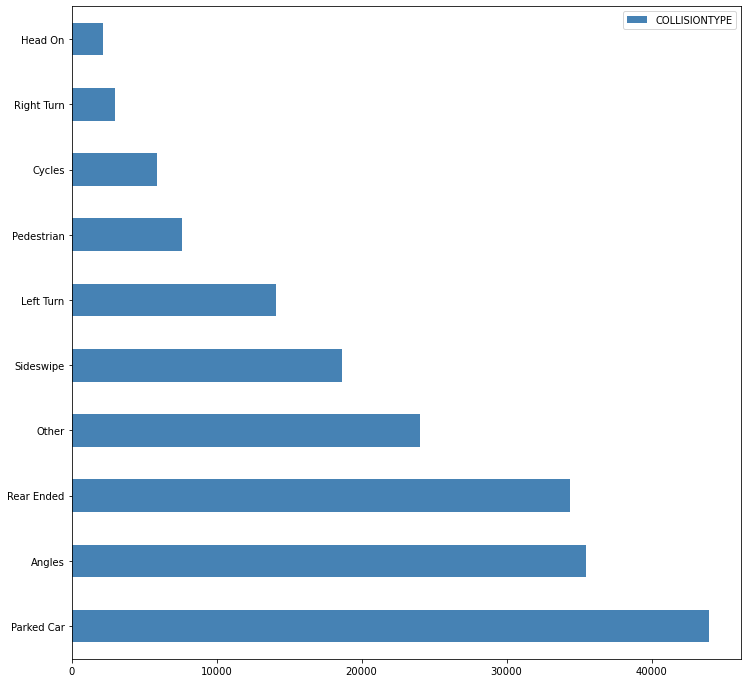

In [63]:
collisionType.plot(kind='barh', figsize=(12, 12), color='steelblue')

In [64]:
data['SEVERITYCODE'].value_counts()

1    128254
2     60925
0         1
Name: SEVERITYCODE, dtype: int64

In [65]:
severitynull= data['SEVERITYCODE']=='0'

In [66]:
data[severitynull]

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ADDRTYPE,INCDATE,INCDTTM
221372,0,Unknown,Pedestrian,Not related to intersection,N,0,Clear,IceWetOil,Daylight,Y,Block,2020-05-06 00:00:00+00:00,2020-05-06


#### Let's drop the row with no value in the target variable

In [67]:
data.drop(data[severitynull].index.values, inplace=True)

In [68]:
data['SEVERITYCODE'].value_counts()

1    128254
2     60925
Name: SEVERITYCODE, dtype: int64

In [69]:
data[['SEVERITYCODE']]=data[['SEVERITYCODE']].astype('int')
data.dtypes

SEVERITYCODE                    int64
SEVERITYDESC                   object
COLLISIONTYPE                  object
JUNCTIONTYPE                   object
INATTENTIONIND                 object
UNDERINFL                       int64
WEATHER                        object
ROADCOND                       object
LIGHTCOND                      object
SPEEDING                       object
ADDRTYPE                       object
INCDATE           datetime64[ns, UTC]
INCDTTM                datetime64[ns]
dtype: object

In [70]:
data['COLLISIONTYPE'].value_counts()

Parked Car    43985
Angles        35457
Rear Ended    34372
Other         24017
Sideswipe     18629
Left Turn     14080
Pedestrian     7583
Cycles         5893
Right Turn     2995
Head On        2168
Name: COLLISIONTYPE, dtype: int64

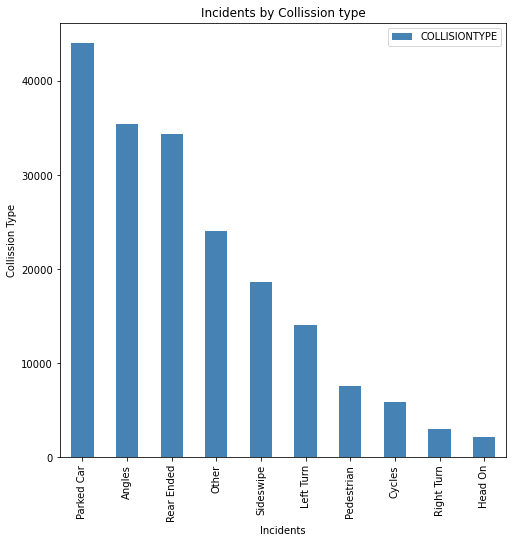

In [71]:
import matplotlib.pyplot as plt
collisionType.plot(kind='bar', figsize=(8, 8), color='steelblue')
plt.xlabel('Incidents')
plt.ylabel('Collission Type')
plt.title('Incidents by Collission type')

plt.show()

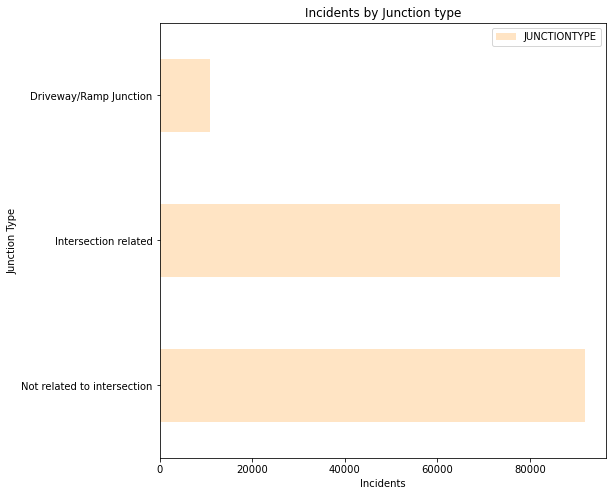

In [72]:
data['JUNCTIONTYPE'].value_counts().to_frame().plot(kind='barh', figsize=(8, 8), color='bisque')
plt.xlabel('Incidents')
plt.ylabel('Junction Type')
plt.title('Incidents by Junction type')

plt.show()

In [167]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


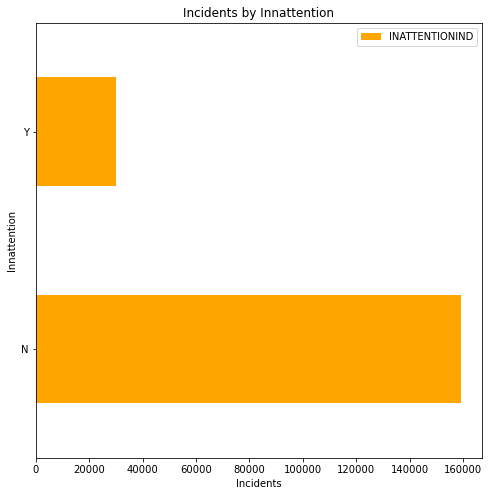

In [73]:
data['INATTENTIONIND'].value_counts().to_frame().plot(kind='barh', figsize=(8, 8), color='orange')
plt.xlabel('Incidents')
plt.ylabel('Innattention')
plt.title('Incidents by Innattention')

plt.show()

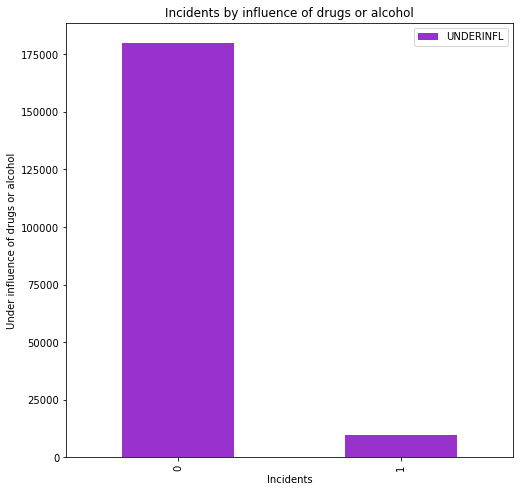

In [74]:
data['UNDERINFL'].value_counts().to_frame().plot(kind='bar', figsize=(8, 8), color='darkorchid')
plt.xlabel('Incidents')
plt.ylabel('Under influence of drugs or alcohol')
plt.title('Incidents by influence of drugs or alcohol')

plt.show()

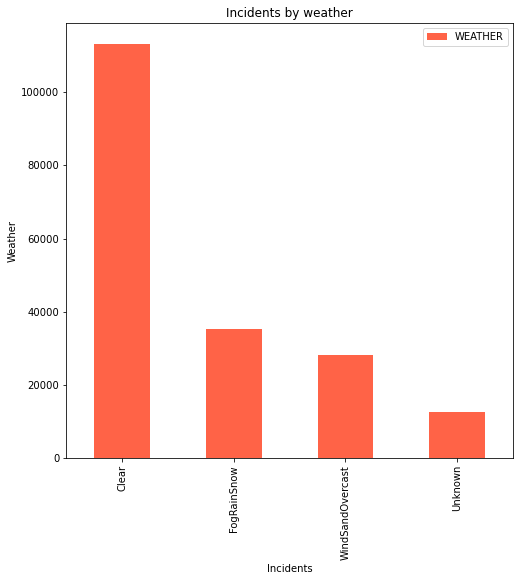

In [75]:
data['WEATHER'].value_counts().to_frame().plot(kind='bar', figsize=(8, 8), color='tomato')
plt.xlabel('Incidents')
plt.ylabel('Weather')
plt.title('Incidents by weather')

plt.show()

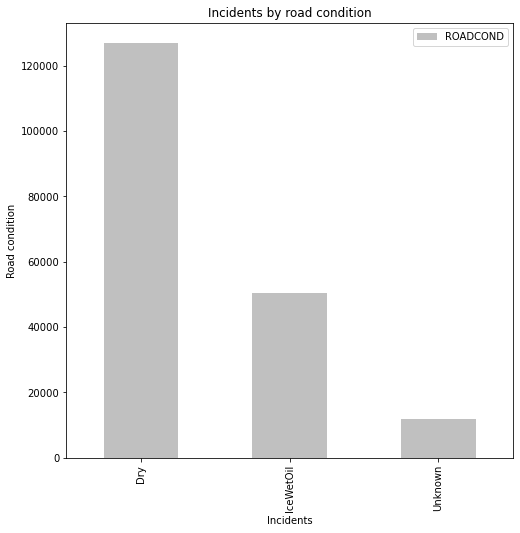

In [76]:
data['ROADCOND'].value_counts().to_frame().plot(kind='bar', figsize=(8, 8), color='silver')
plt.xlabel('Incidents')
plt.ylabel('Road condition')
plt.title('Incidents by road condition')

plt.show()

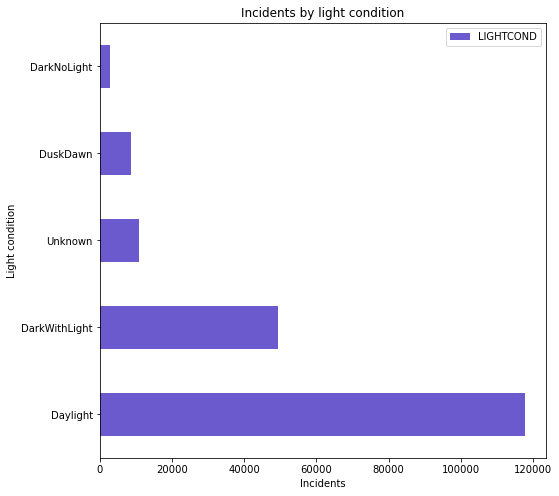

In [77]:
data['LIGHTCOND'].value_counts().to_frame().plot(kind='barh', figsize=(8, 8), color='slateblue')
plt.xlabel('Incidents')
plt.ylabel('Light condition')
plt.title('Incidents by light condition')

plt.show()

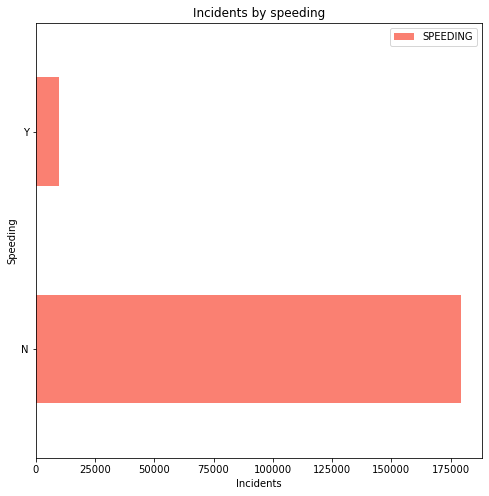

In [78]:
data['SPEEDING'].value_counts().to_frame().plot(kind='barh', figsize=(8, 8), color='salmon')
plt.xlabel('Incidents')
plt.ylabel('Speeding')
plt.title('Incidents by speeding')

plt.show()

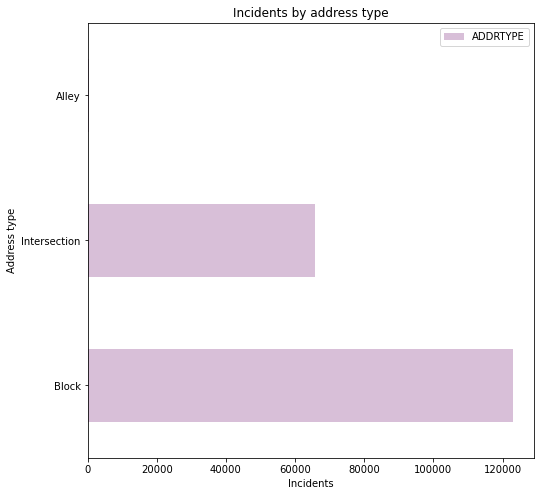

In [79]:
data['ADDRTYPE'].value_counts().to_frame().plot(kind='barh', figsize=(8, 8), color='thistle')
plt.xlabel('Incidents')
plt.ylabel('Address type')
plt.title('Incidents by address type')

plt.show()

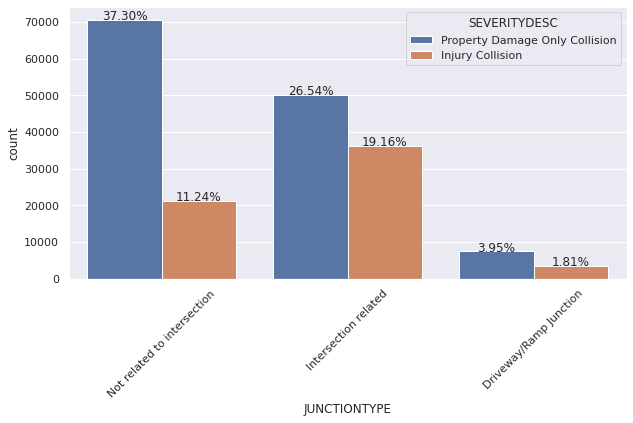

In [80]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
total = float(len(data))
ax = sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYDESC", data=data) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

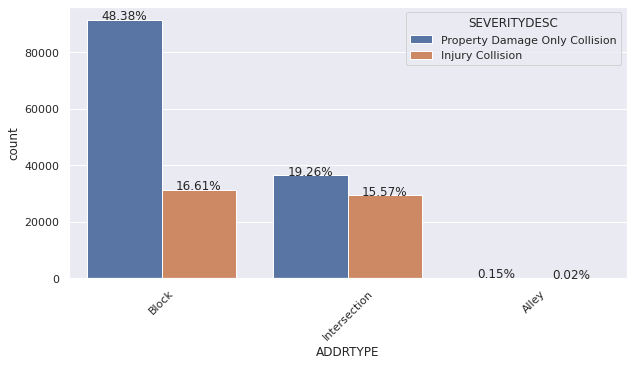

In [81]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
total = float(len(data))
ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC", data=data) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [82]:
y = data["SEVERITYCODE"]

### Converting categorical features to numerical values

In [83]:
df = data[['COLLISIONTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'ADDRTYPE']]
X = df.values
X[0:5]

array([['Sideswipe', 'Not related to intersection', 'N', 0,
        'WindSandOvercast', 'Dry', 'Daylight', 'N', 'Block'],
       ['Cycles', 'Intersection related', 'N', 0, 'Clear', 'Dry',
        'Daylight', 'N', 'Intersection'],
       ['Left Turn', 'Intersection related', 'N', 0, 'WindSandOvercast',
        'Dry', 'Daylight', 'N', 'Intersection'],
       ['Sideswipe', 'Intersection related', 'N', 0, 'Clear', 'Dry',
        'Daylight', 'N', 'Intersection'],
       ['Right Turn', 'Not related to intersection', 'N', 0, 'Clear',
        'Dry', 'Daylight', 'N', 'Block']], dtype=object)

In [84]:
# Categorical boolean mask
cat_feature_mask = df.dtypes==object
cat_feature_mask

COLLISIONTYPE      True
JUNCTIONTYPE       True
INATTENTIONIND     True
UNDERINFL         False
WEATHER            True
ROADCOND           True
LIGHTCOND          True
SPEEDING           True
ADDRTYPE           True
dtype: bool

In [93]:
'''data.dtypes==object'''

SEVERITYCODE      False
SEVERITYDESC       True
COLLISIONTYPE      True
JUNCTIONTYPE       True
INATTENTIONIND     True
UNDERINFL         False
WEATHER            True
ROADCOND           True
LIGHTCOND          True
SPEEDING           True
ADDRTYPE           True
INCDATE           False
INCDTTM           False
dtype: bool

In [94]:
'''# categorical columns mask
cat_cols = df.columns[cat_feature_mask].tolist()
cat_cols'''

['COLLISIONTYPE',
 'JUNCTIONTYPE',
 'INATTENTIONIND',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'SPEEDING',
 'ADDRTYPE']

In [95]:
'''# LabelEncoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()'''

In [96]:
'''# apply le on categorical feature columns
df[cat_cols] = df[cat_cols].apply(lambda col: le.fit_transform(col))
df[cat_cols].head(10)'''

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ADDRTYPE
1,9,2,0,3,0,2,0,1
2,1,1,0,0,0,2,0,2
3,3,1,0,3,0,2,0,2
4,9,1,0,0,0,2,0,2
5,8,2,0,0,0,2,0,1
6,0,1,0,0,0,0,1,2
7,2,1,1,0,0,2,0,1
8,5,0,0,0,0,2,0,1
9,7,2,0,1,1,1,0,1
10,6,1,0,0,0,2,0,2


In [97]:
'''X[0:5]'''

array([['Sideswipe', 'Not related to intersection', 'N', 0,
        'WindSandOvercast', 'Dry', 'Daylight', 'N', 'Block'],
       ['Cycles', 'Intersection related', 'N', 0, 'Clear', 'Dry',
        'Daylight', 'N', 'Intersection'],
       ['Left Turn', 'Intersection related', 'N', 0, 'WindSandOvercast',
        'Dry', 'Daylight', 'N', 'Intersection'],
       ['Sideswipe', 'Intersection related', 'N', 0, 'Clear', 'Dry',
        'Daylight', 'N', 'Intersection'],
       ['Right Turn', 'Not related to intersection', 'N', 0, 'Clear',
        'Dry', 'Daylight', 'N', 'Block']], dtype=object)

In [ ]:
'''from sklearn import preprocessing
le_ADDRTYPE = preprocessing.LabelEncoder()

le_ADDRTYPE.fit(['Intersection', 'Block', 'Alley'])
X[:,0] = le_ADDRTYPE.transform(X[:,0]) 

le_JUNCTIONTYPE = preprocessing.LabelEncoder()
X[:,1] = le_JUNCTIONTYPE.fit([ 'Mid-Block (not related to intersection)', 'RampDriveway',
       'Mid-Block (but intersection related)','At-Intersection']).transform(X[:,1])

le_INATTENTIONIND = preprocessing.LabelEncoder()
X[:,2] = le_INATTENTIONIND.fit(['N', 'Y']).transform(X[:,2]) 

le_UNDERINFL = preprocessing.LabelEncoder()
X[:,3] = le_UNDERINFL.fit(['N', 'Y']).transform(X[:,3]) 

le_WEATHER = preprocessing.LabelEncoder()
X[:,4] = le_WEATHER.fit(['Overcast', 'RainSnow', 'Clear', 'Unknown']).transform(X[:,4]) 

le_ROADCOND = preprocessing.LabelEncoder()
X[:,5] = le_ROADCOND.fit(['Wet', 'Dry', 'Unknown', 'IceOilWaterSnow']).transform(X[:,5]) 

le_LIGHTCOND = preprocessing.LabelEncoder()
X[:,6] = le_LIGHTCOND.fit(['Daylight', 'Dark-With-Light', 'Dark-No-Light', 'Unknown','DuskDawn']).transform(X[:,6]) 

le_SPEEDING = preprocessing.LabelEncoder()
X[:,7] = le_SPEEDING.fit(['N', 'Y']).transform(X[:,7]) 

le_RiskTime = preprocessing.LabelEncoder()
X[:,8] = le_RiskTime.fit(['Medium', 'Low', 'High']).transform(X[:,8]) 

le_weekend = preprocessing.LabelEncoder()
X[:,9] = le_weekend.fit([0, 1]).transform(X[:,9]) 

X[0:5]'''

### One-Hot-Encoder  to avoid over-weigh problems

In [85]:
print(df.shape)
dummy_df = pd.get_dummies(df)
# dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
print("----After Dummy Fuction------")
print(dummy_df.shape)
dummy_df.head(5)

(189179, 9)
----After Dummy Fuction------
(189179, 33)


,UNDERINFL,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,...,LIGHTCOND_DarkNoLight,LIGHTCOND_DarkWithLight,LIGHTCOND_Daylight,LIGHTCOND_DuskDawn,LIGHTCOND_Unknown,SPEEDING_N,SPEEDING_Y,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [86]:
X = dummy_df.values
X[0:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]])

## Model

In [87]:
from sklearn.model_selection import train_test_split
#Test/Train split
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train_raw.shape,  y_train_raw.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (113507, 33) (113507,)
Test set: (75672, 33) (75672,)


In [88]:
# Balance the Data using SMOTE mathod
# !pip3 install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (0.7.0)


In [89]:
# Balance the Data using SMOTE mathod, system will generate more data to balance the unbalanced data
import imblearn
from imblearn.over_sampling import SMOTE

os = SMOTE (random_state=0)
X_train, y_train = os.fit_sample(X_train_raw, y_train_raw)
print ('Train set:', X_train.shape,  y_train.shape)

Train set: (154078, 33) (154078,)


In [90]:
print("----------Sample % before SMOTE--------------")
print(y_train_raw.value_counts()/len(y_train_raw))
print("----------Sample % After SMOTE --------------")
print(pd.Series(y_train).value_counts()/len(y_train))

----------Sample % before SMOTE--------------
1    0.678716
2    0.321284
Name: SEVERITYCODE, dtype: float64
----------Sample % After SMOTE --------------
2    0.5
1    0.5
Name: SEVERITYCODE, dtype: float64


## Classification

### K Nearest Neighbor

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Find the best K between 1 an 10
grid_params = {'n_neighbors': [i for i in range(1, 10)]}
grid = GridSearchCV(KNeighborsClassifier(),grid_params,cv = 5)
grid_results = grid.fit(X_train, y_train)
print('ok')

ok


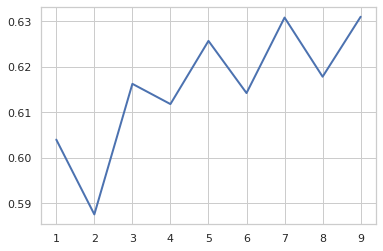

In [92]:
# visual the result of finding best K
sns.set_style("whitegrid")
sns.lineplot(grid_params['n_neighbors'], grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)

In [95]:
grid_results

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [102]:
print("The best n_neighbors was  : ", grid_results.best_params_['n_neighbors'])
print("The best accuracy was with: ", grid_results.best_score_.round(2))

The best n_neighbors was  :  9
The best accuracy was with:  0.63


In [103]:
# using the best K (9) to model
#neigh = KNeighborsClassifier(n_neighbors = grid_results.best_params_.get('n_neighbors')).fit(X_train,y_train)
neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
yhat_train = neigh.predict(X_train)

In [104]:
print("KNN Accuracy     : {:.2f}".format(metrics.accuracy_score(y_train, yhat_train)))
print("KNN Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train)))
print("KNN F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train, average='weighted')))

KNN Accuracy     : 0.65
KNN Jaccard index: 0.54
KNN F1-score     : 0.63


[[64968 12071]
 [42437 34602]]
              precision    recall  f1-score   support

           1       0.60      0.84      0.70     77039
           2       0.74      0.45      0.56     77039

    accuracy                           0.65    154078
   macro avg       0.67      0.65      0.63    154078
weighted avg       0.67      0.65      0.63    154078



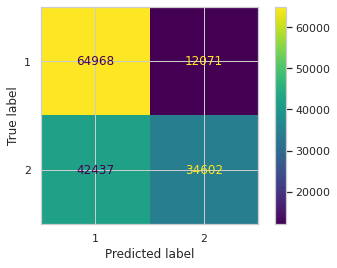

In [105]:

# Train data result: Confusion Matrix and report
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train))
print(classification_report(y_train, yhat_train))

plot_confusion_matrix(neigh, X_train, y_train, include_values=True)
plt.show()

[[42758  8457]
 [13782 10675]]
              precision    recall  f1-score   support

           1       0.76      0.83      0.79     51215
           2       0.56      0.44      0.49     24457

    accuracy                           0.71     75672
   macro avg       0.66      0.64      0.64     75672
weighted avg       0.69      0.71      0.70     75672



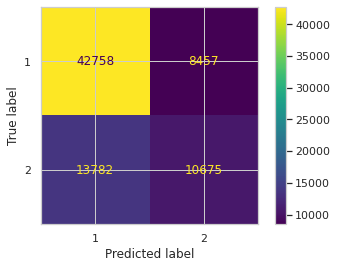

ok


In [107]:
# Test dataset result
yhat_test = neigh.predict(X_test)

print(confusion_matrix(y_test, yhat_test))
print(classification_report(y_test, yhat_test))

plot_confusion_matrix(neigh, X_test, y_test, include_values=True)
plt.show()
print('ok')

In [112]:
!pip install graphviz

## Decision Tree

The best tree_depth was:  24
The best accuracy was  :  0.7049871228968597


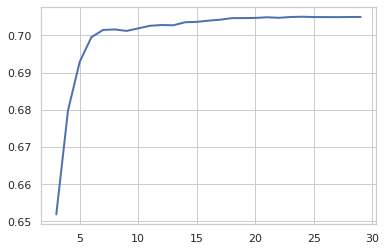

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import matplotlib.image as mpimg

# Find the best para
tree_grid_params = {'criterion': ['entropy'], 'max_depth': [i for i in range(3,30)]}
tree_grid = GridSearchCV(tree.DecisionTreeClassifier(), tree_grid_params, cv = 3)
tree_grid_results = tree_grid.fit(X_train, y_train)

#plot the result of finding best para
sns.set_style("whitegrid")
sns.lineplot(tree_grid_params['max_depth'], tree_grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)
print("The best tree_depth was: ",tree_grid_results.best_params_["max_depth"])
print("The best accuracy was  : ",tree_grid_results.best_score_)

In [114]:
# using the best result
carTree = DecisionTreeClassifier(criterion="entropy", max_depth = tree_grid_results.best_params_.get('max_depth'))
carTree.fit(X_train,y_train)
y_predTree = carTree.predict(X_train)
print("loanTree Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, y_predTree)))
print("loanTree F1-score     : {:.2f}".format(metrics.f1_score(y_train, y_predTree, average='weighted')))

loanTree Jaccard index: 0.53
loanTree F1-score     : 0.72


[[48361 28678]
 [14869 62170]]
              precision    recall  f1-score   support

           1       0.76      0.63      0.69     77039
           2       0.68      0.81      0.74     77039

    accuracy                           0.72    154078
   macro avg       0.72      0.72      0.72    154078
weighted avg       0.72      0.72      0.72    154078



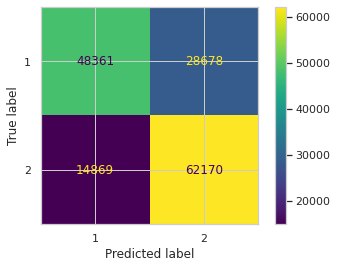

In [115]:
# # Confusion Matrix and report - Train data
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, y_predTree))
print(classification_report(y_train, y_predTree))

plot_confusion_matrix(carTree, X_train, y_train, include_values=True)
plt.show()

In [116]:
# # Confusion Matrix and report - Train data
y_test_predTree = carTree.predict(X_test)
print(confusion_matrix(y_test, y_test_predTree))
print(classification_report(y_test, y_test_predTree))

[[31548 19667]
 [ 5631 18826]]
              precision    recall  f1-score   support

           1       0.85      0.62      0.71     51215
           2       0.49      0.77      0.60     24457

    accuracy                           0.67     75672
   macro avg       0.67      0.69      0.66     75672
weighted avg       0.73      0.67      0.68     75672



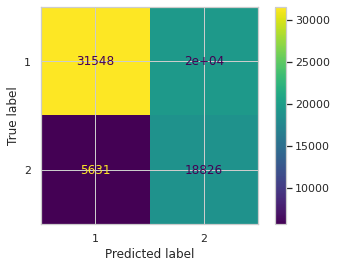

In [117]:
# Visualize the result
plot_confusion_matrix(carTree, X_test, y_test, include_values=True)
plt.show()

In [ ]:
# Visualize Decision Tree
#!pip3 install pydot
#!pip3 install graphviz
import pandas as pd
import numpy as np
from sklearn import tree
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

#X = data[['COLLISIONTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
 #      'LIGHTCOND', 'SPEEDING', 'ADDRTYPE']]

from sklearn import tree
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(carTree, feature_names = X.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()
#plt.savefig('filename.png')

In [122]:
sklearn.__version__

'0.23.1'

In [123]:
!pip install --upgrade scikit-learn==0.20.3

     |████████████████████████████████| 5.4 MB 4.4 MB/s eta 0:00:01
ERROR: imbalanced-learn 0.7.0 has requirement scikit-learn>=0.23, but you'll have scikit-learn 0.20.3 which is incompatible.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


## Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# find the best para9
grid_params = {"C":np.logspace(-2,2,5), "penalty":["l2"]} # l1 lasso l2 ridge
LR_grid = GridSearchCV(LogisticRegression(max_iter=7000),grid_params,cv=3)
LR_grid.fit(X_train,y_train)

print("The best parameter was: ",LR_grid.best_params_) # {'C': 0.001, 'penalty': 'l2'}
print("The best accuracy was : ",LR_grid.best_score_)

The best parameter was:  {'C': 10.0, 'penalty': 'l2'}
The best accuracy was :  0.7042991627744812


In [149]:
X = dummy_df.values
X[0:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]])

In [151]:
# Using the best parameter to model
LR = LogisticRegression(C=10.0, solver='liblinear',penalty='l2').fit(X,y)
yhat_train_LR = LR.predict(X_train)
yhat_train_LR_prob = LR.predict_proba(X_train)
print('ok')

ok


[[74107  2932]
 [57248 19791]]
              precision    recall  f1-score   support

           1       0.56      0.96      0.71     77039
           2       0.87      0.26      0.40     77039

    accuracy                           0.61    154078
   macro avg       0.72      0.61      0.55    154078
weighted avg       0.72      0.61      0.55    154078



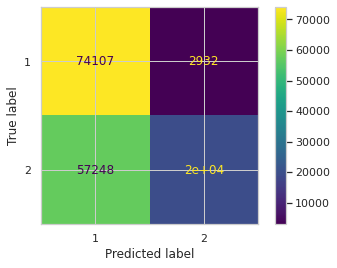

In [152]:

# # Confusion Matrix and report - Train data
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train_LR))
print(classification_report(y_train, yhat_train_LR))

plot_confusion_matrix(LR, X_train, y_train, include_values=True)
plt.show()

[[49297  1918]
 [18080  6377]]
              precision    recall  f1-score   support

           1       0.73      0.96      0.83     51215
           2       0.77      0.26      0.39     24457

    accuracy                           0.74     75672
   macro avg       0.75      0.61      0.61     75672
weighted avg       0.74      0.74      0.69     75672



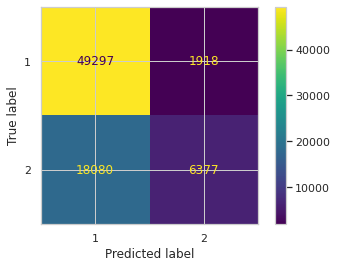

In [153]:
# # Confusion Matrix and report - Test data
yhat_test_LR = LR.predict(X_test)

print(confusion_matrix(y_test, yhat_test_LR))
print(classification_report(y_test, yhat_test_LR))

plot_confusion_matrix(LR, X_test, y_test, include_values=True)
plt.show()